In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# pip install --upgrade pandas fixes strange csv export error 

In [3]:

class MLP:
    def __init__(self, no_inputs : int, no_hidden_units : int, no_outputs : int) -> None:
        
        # node set up
        self.no_inputs = no_inputs
        self.no_hidden_units = no_hidden_units
        self.no_outputs = no_outputs 

        # biases & weights 
        self.W1 = np.zeros((no_inputs, no_hidden_units))                # input - hidden
        self.B1 = np.zeros(no_hidden_units)
        self.W2 = np.zeros((no_hidden_units, no_outputs))               # hidden - output 
        self.B2 = np.zeros(no_outputs)

        # deltas  
        self.dW1 = np.zeros((no_inputs, no_hidden_units))               # ΔW1 (input - hidden)
        self.dB1 = np.zeros(no_hidden_units)   
        self.dW2 = np.zeros((no_hidden_units, no_outputs))              # ΔW2 (hidden - output)
        self.dB2 = np.zeros(no_outputs)

        # activations
        self.Z1 = np.zeros(no_hidden_units)                             # hidden 
        self.Z2 = np.zeros(no_outputs)                                  # output 

        # neuron values 
        self.H = np.zeros(no_hidden_units)                              # hidden 
        self.O = np.zeros(no_outputs)                                   # output

    def randomise(self, scale : float) -> None:

        # intialise weights with random values
        self.W1 = np.random.uniform(scale * -1, scale, (self.no_inputs, self.no_hidden_units))
        self.B1 = np.random.uniform(scale * -1, scale,  self.no_hidden_units)
        self.W2 = np.random.uniform(scale * -1, scale, (self.no_hidden_units, self.no_outputs))
        self.B2 = np.random.uniform(scale * -1, scale,  self.no_outputs)
        
        # set deltas back to zero 
        self.dW1 = np.zeros((self.no_inputs, self.no_hidden_units)) 
        self.dB1 = np.zeros(self.no_hidden_units)
        self.dW2 = np.zeros((self.no_hidden_units, self.no_outputs))  
        self.dB2 = np.zeros(self.no_outputs)

    def toString(self) -> None: 
        for name in ['B1', 'B2', 'H', 'O', 'W1', 'W2', 'Z1', 'Z2']: 
            print("----------------- \n")
            print(f"{name} : {getattr(self, name)}")

    ## Non linear activation function for hidden layer
    def relu(self, x : np.ndarray) -> np.ndarray:
        return np.maximum(0, x)
    
    def relu_derivative(self, x: np.ndarray) -> np.ndarray:
        # determine positive vector 
        greater_than_zero = x > 0
        derivative = greater_than_zero.astype(float)
        return derivative
    
    def tanh(self, x: np.ndarray) -> np.ndarray:
        return np.tanh(x)

    def tanh_derivative(self, x: np.ndarray) -> np.ndarray:
        return 1 - np.tanh(x) ** 2

    ## Bounded [0, 1] activation function for output layer
    def sigmoid(self, x : np.ndarray) -> np.ndarray:
        x = np.clip(x, -500, 500) # apply constraint
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x: np.ndarray) -> np.ndarray:
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    # def linear(self, x: np.ndarray) -> np.ndarray:
    #     return x

    # def linear_derivative(self, x: np.ndarray) -> np.ndarray:
    #     return np.ones_like(x)

    def forward(self, input : np.ndarray) -> np.ndarray: 

        # hidden layer
        self.Z1 = np.dot(input, self.W1) + self.B1          # input * weights + bias --> hidden
        self.H = self.sigmoid(self.Z1)    # activation? hidden layer
        
        self.Z2 = np.dot(self.H, self.W2) + self.B2         # (hidden layer output) * weights + bias --> output
        self.O = self.sigmoid(self.Z2) 

        return self.O

    def backward(self, input, targets : np.ndarray) -> float: 

        # distance between output and actual
        error = np.mean(np.square(targets - self.O))

        delta_output =  (self.O - targets) * self.sigmoid_derivative(self.O)
        dW2_update = np.dot(self.H.T, delta_output)
        self.dW2 += dW2_update
        self.dB2 += np.sum(delta_output, axis=0)
        
        delta_hidden = np.dot(delta_output, self.W2.T) * self.sigmoid_derivative(self.H)  
        dW1_update = np.dot(input.T, delta_hidden)    
        self.dW1 += dW1_update    
        self.dB1 += np.sum(delta_hidden, axis=0)     
        
        return error

    def update_weights(self, learning_rate : float) -> None: 
        
        # new weight = step * delta 
        self.W1 -= learning_rate * self.dW1
        self.B1 -= learning_rate * self.dB1
        self.W2 -= learning_rate * self.dW2
        self.B2 -= learning_rate * self.dB2

        # Reset deltas to zero
        self.dW1 = np.zeros_like(self.dW1)
        self.dW2 = np.zeros_like(self.dW2)
        self.dB1 = np.zeros_like(self.dB1)
        self.dB2 = np.zeros_like(self.dB2)

In [4]:
def train(NN : MLP, X : np.array, y : np.array, epoches : int, learning_rate : float, batch_size : int) -> dict:
    results = {}

    for t in range(epoches): 

        ## do training
        output = NN.forward(X)
        error = NN.backward(X, y)

        ## update weights
        if (t % batch_size == 0): # adjust weight update frequency
            NN.update_weights(learning_rate)
        
        ## store errors
        results[t] = error

    return results

In [5]:
def generate_NN(NI : int, NH : int, NO : int, rand_init : int) -> MLP: 
    NN = MLP(NI, NH, NO)
    NN.randomise(rand_init)
    return NN

Question 1: XOR Training

In [ ]:
# training data 
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
y = np.array([[0], [1], [1], [0]])   

NI = 2
NH = 4
NO = 1

rand_inits = [0.01, 0.1, 1]
epochs = [100, 1000, 10000]
learning_rates = [0.01, 0.1, 0.4, 1]
batch_sizes = [2, 5, 10]
hidden_nodes = [3, 5, 10]

final_results_dict = []

for epoch in epochs:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes: 
            for rand_init in rand_inits: 
                for hidden_node in hidden_nodes: 
                    NN = generate_NN(NI, hidden_node, NO, rand_init)
                    results = train(NN, X, y, epoch, learning_rate, batch_size)

                    epochs_list = list(results.keys())
                    error_list = list(results.values())

                    final_results_dict.append({
                        'total_epoches': epoch,
                        'hidden_nodes' : hidden_node,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'rand_init': rand_init,
                        'epochs': epochs_list,
                        'error' : error_list,
                        'final_error': error_list[-1]  
                    })

sorted_results = sorted(final_results_dict, key=lambda x: x['final_error']) # sort by error 

worst_config = sorted_results[-1]
best_config = sorted_results[0]
good_config = sorted_results[5]


In [ ]:
df = pd.DataFrame(sorted_results)
df.to_csv("question1_results", index=False)

OSError: [Errno 22] Invalid argument: 'question1_results'

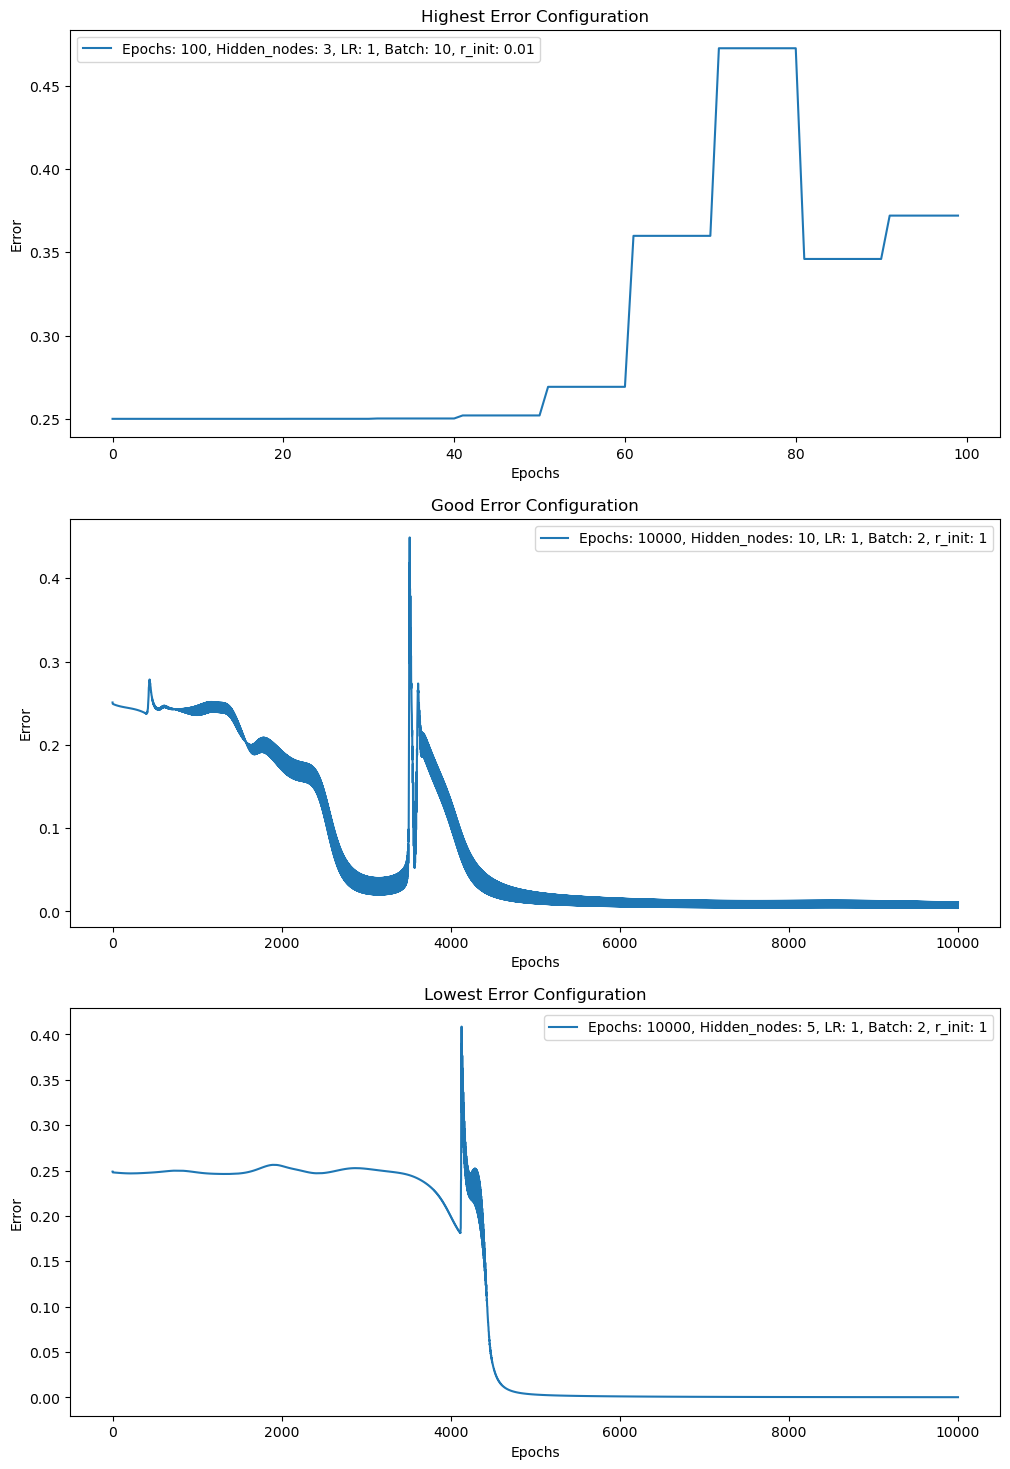

High Error : 0.3720129706042615
Middle Error : 0.010947633514243672
Lowest Error : 0.0002235262785475182


In [ ]:
plt.figure(figsize=(12, 18)) 

plt.subplot(3, 1, 1)
plt.plot(worst_config['epochs'], worst_config['error'], label=f"Epochs: {worst_config['total_epoches']}, Hidden_nodes: {worst_config['hidden_nodes']}, LR: {worst_config['learning_rate']}, Batch: {worst_config['batch_size']}, r_init: {worst_config['rand_init']}")
plt.title("Highest Error Configuration")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(good_config['epochs'], good_config['error'], label=f"Epochs: {good_config['total_epoches']}, Hidden_nodes: {good_config['hidden_nodes']}, LR: {good_config['learning_rate']}, Batch: {good_config['batch_size']}, r_init: {good_config['rand_init']}")
plt.title("Good Error Configuration")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(best_config['epochs'], best_config['error'], label=f"Epochs: {best_config['total_epoches']}, Hidden_nodes: {best_config['hidden_nodes']}, LR: {best_config['learning_rate']}, Batch: {best_config['batch_size']}, r_init: {best_config['rand_init']}")
plt.title("Lowest Error Configuration")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

plt.show()

# Print errors
print(f"High Error : {worst_config['final_error']}")
print(f"Middle Error : {good_config['final_error']}") 
print(f"Lowest Error : {best_config['final_error']}")


Question 2: Prediction Test

In [ ]:
## best performing hyperparameters
learning_rate = best_config["learning_rate"]
rand_init = best_config["rand_init"]
epoches = best_config["total_epoches"]
batch_size = best_config["batch_size"]

## train 
NN = generate_NN(NI,NH, NO, rand_init)
train(NN, X, y, epoches, learning_rate, batch_size)

## test 
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
expected_outputs = np.array([[0], [1], [1], [0]])   

# compare predictions to actual values 
print(f"LR : {learning_rate}, R_init : {rand_init}, epoches : {epoches}, batch_size : {batch_size}")

for input, target in zip(test_inputs, expected_outputs): 
    output = NN.forward(input)
    print(f"Input: {input}, Predicted: {output}, Target: {target}")


LR : 1, R_init : 1, epoches : 10000, batch_size : 2
Input: [0 0], Predicted: [0.00845084], Target: [0]
Input: [0 1], Predicted: [0.98880338], Target: [1]
Input: [1 0], Predicted: [0.98933468], Target: [1]
Input: [1 1], Predicted: [0.00843539], Target: [0]


Question 3

In [ ]:
class MLP:
    def __init__(self, no_inputs : int, no_hidden_units : int, no_outputs : int) -> None:
        
        # node set up
        self.no_inputs = no_inputs
        self.no_hidden_units = no_hidden_units
        self.no_outputs = no_outputs 

        # biases & weights 
        self.W1 = np.zeros((no_inputs, no_hidden_units))                # input - hidden
        self.B1 = np.zeros(no_hidden_units)
        self.W2 = np.zeros((no_hidden_units, no_outputs))               # hidden - output 
        self.B2 = np.zeros(no_outputs)

        # deltas  
        self.dW1 = np.zeros((no_inputs, no_hidden_units))               # ΔW1 (input - hidden)
        self.dB1 = np.zeros(no_hidden_units)   
        self.dW2 = np.zeros((no_hidden_units, no_outputs))              # ΔW2 (hidden - output)
        self.dB2 = np.zeros(no_outputs)

        # activations
        self.Z1 = np.zeros(no_hidden_units)                             # hidden 
        self.Z2 = np.zeros(no_outputs)                                  # output 

        # neuron values 
        self.H = np.zeros(no_hidden_units)                              # hidden 
        self.O = np.zeros(no_outputs)                                   # output

    def randomise(self, scale : float) -> None:

        # intialise weights with random values
        self.W1 = np.random.uniform(scale * -1, scale, (self.no_inputs, self.no_hidden_units))
        self.B1 = np.random.uniform(scale * -1, scale,  self.no_hidden_units)
        self.W2 = np.random.uniform(scale * -1, scale, (self.no_hidden_units, self.no_outputs))
        self.B2 = np.random.uniform(scale * -1, scale,  self.no_outputs)
        
        # set deltas back to zero 
        self.dW1 = np.zeros((self.no_inputs, self.no_hidden_units)) 
        self.dB1 = np.zeros(self.no_hidden_units)
        self.dW2 = np.zeros((self.no_hidden_units, self.no_outputs))  
        self.dB2 = np.zeros(self.no_outputs)

    def toString(self) -> None: 
        for name in ['B1', 'B2', 'H', 'O', 'W1', 'W2', 'Z1', 'Z2']: 
            print("----------------- \n")
            print(f"{name} : {getattr(self, name)}")

    ## Non linear activation function for hidden layer
    def relu(self, x : np.ndarray) -> np.ndarray:
        return np.maximum(0, x)
    
    def relu_derivative(self, x: np.ndarray) -> np.ndarray:
        # determine positive vector 
        greater_than_zero = x > 0
        derivative = greater_than_zero.astype(float)
        return derivative
    
    def tanh(self, x: np.ndarray) -> np.ndarray:
        return np.tanh(x)

    def tanh_derivative(self, x: np.ndarray) -> np.ndarray:
        return 1 - np.tanh(x) ** 2

    ## Bounded [0, 1] activation function for output layer
    def sigmoid(self, x : np.ndarray) -> np.ndarray:
        x = np.clip(x, -500, 500) # apply constraint
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x: np.ndarray) -> np.ndarray:
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def linear(self, x: np.ndarray) -> np.ndarray:
        return x

    def linear_derivative(self, x: np.ndarray) -> np.ndarray:
        return np.ones_like(x)

    def forward(self, input : np.ndarray) -> np.ndarray: 
        
        input = input.reshape(1, -1)

        # hidden layer
        self.Z1 = np.dot(input, self.W1) + self.B1          # input * weights + bias --> hidden
        self.H = self.tanh(self.Z1)    # activation? hidden layer
        
        self.Z2 = np.dot(self.H, self.W2) + self.B2         # (hidden layer output) * weights + bias --> output
        self.O = self.linear(self.Z2) 

        return self.O

    def backward(self, input, targets: np.ndarray) -> float:
        # Calculate error (mean squared error)
        error = np.mean(np.square(targets - self.O))

        # Output layer gradient
        delta_output = (self.O - targets) * self.linear_derivative(self.O)
        dW2_update = np.dot(self.H.reshape(-1, 1), delta_output.reshape(1, -1))  # Update weights
        self.dW2 += dW2_update
        self.dB2 += np.sum(delta_output, axis=0)  # Sum gradients for biases
        
        # Hidden layer gradient
        delta_hidden = np.dot(delta_output, self.W2.T) * self.tanh_derivative(self.H)
        dW1_update = np.dot(input.T, delta_hidden)  # Corrected gradient update
        self.dW1 += dW1_update
        self.dB1 += np.sum(delta_hidden, axis=0)  # Sum gradients for biases
        
        return error

    def update_weights(self, learning_rate : float) -> None: 
        
        # new weight = step * delta 
        self.W1 -= learning_rate * self.dW1
        self.B1 -= learning_rate * self.dB1
        self.W2 -= learning_rate * self.dW2
        self.B2 -= learning_rate * self.dB2

        # Reset deltas to zero
        self.dW1 = np.zeros_like(self.dW1)
        self.dW2 = np.zeros_like(self.dW2)
        self.dB1 = np.zeros_like(self.dB1)
        self.dB2 = np.zeros_like(self.dB2)


In [ ]:
def generate_NN(NI : int, NH : int, NO : int, rand_init : int) -> MLP: 
    NN = MLP(NI, NH, NO)
    NN.randomise(rand_init)
    return NN

In [ ]:
def train(NN : MLP, X : np.array, y : np.array, epoches : int, learning_rate : float, batch_size : int) -> dict:
    results = {}

    for t in range(epoches): 
        for i in range(len(X)): 
            ## do training
            input = X[i].reshape(1, -1)
            output = NN.forward(input)

            targets = y[i].reshape(1, -1)
            error = NN.backward(input, targets)

            ## update weights
            if (t % batch_size == 0): # adjust weight update frequency
                NN.update_weights(learning_rate)
            
            ## store errors
            results[t] = error

    return results

In [ ]:
# generate dataset
inputs = np.random.uniform(-1, 1, size=(500, 4))

# train
train_vectors = inputs[:400] 
train_ouputs = np.sin(train_vectors[:, 0] - train_vectors[:, 1] + train_vectors[:, 2] - train_vectors[:, 3])

# test
test_vectors = inputs[400:]   
test_ouputs = np.sin(test_vectors[:, 0] - test_vectors[:, 1] + test_vectors[:, 2] - test_vectors[:, 3])

NI = 4
NH = 5
NO = 1

# rand_inits = [0.1, 1]
# epochs = [100, 1000]
# learning_rates = [0.1, 1]
# batch_sizes = [5, 10]
# hidden_nodes = [5, 8]

rand_inits = [0.1]
epochs = [1000]
learning_rates = [0.1]
batch_sizes = [5, 10]
hidden_nodes = [5, 8]

final_results_dict = []

for epoch in epochs:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes: 
            for rand_init in rand_inits: 
                for hidden_node in hidden_nodes: 
                    NN = generate_NN(NI, hidden_node, NO, rand_init)
                    results = train(NN, train_vectors, train_ouputs, epoch, learning_rate, batch_size)

                    epochs_list = list(results.keys())
                    error_list = list(results.values())

                    final_results_dict.append({
                        'total_epoches': epoch,
                        'hidden_nodes' : hidden_node,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'rand_init': rand_init,
                        'epochs': epochs_list,
                        'error' : error_list,
                        'final_error': error_list[-1]  
                    })


In [ ]:
sorted_results = sorted(final_results_dict, key=lambda x: x['final_error']) # sort by error 

worst_config = sorted_results[-1]
best_config = sorted_results[0]
good_config = sorted_results[2]

In [ ]:
df = pd.DataFrame(sorted_results)
df.to_csv("SIN_results.csv", index=False)

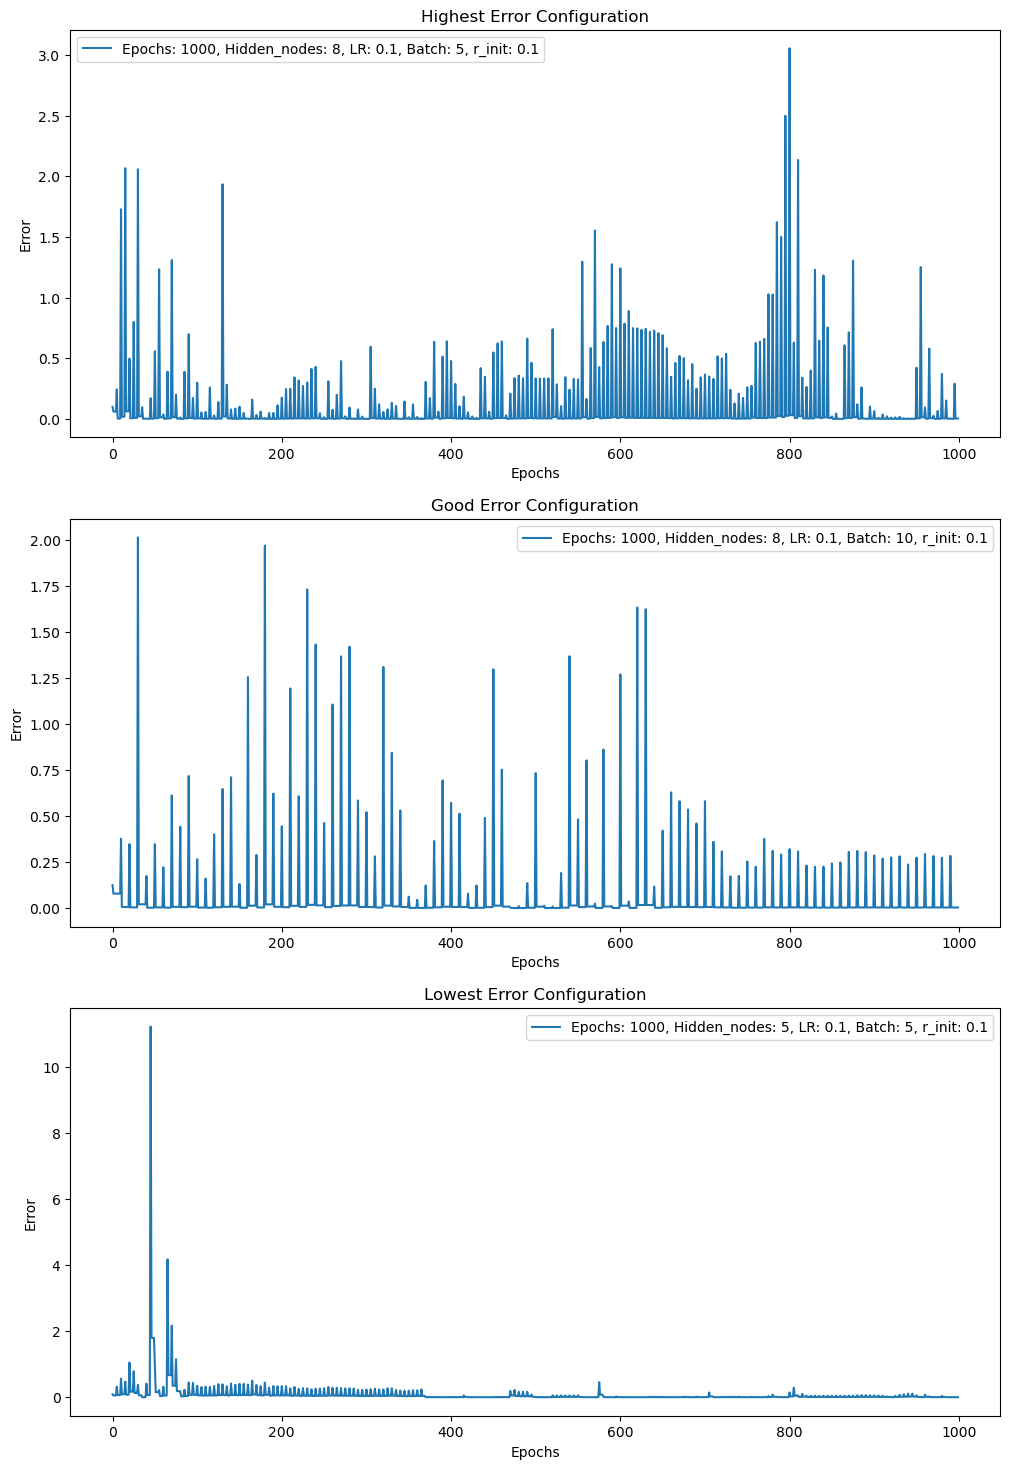

High Error : 0.0028943738745799657
Middle Error : 0.002837608604271203
Lowest Error : 0.0002966978331964021


In [ ]:
plt.figure(figsize=(12, 18)) 

plt.subplot(3, 1, 1)
plt.plot(worst_config['epochs'], worst_config['error'], label=f"Epochs: {worst_config['total_epoches']}, Hidden_nodes: {worst_config['hidden_nodes']}, LR: {worst_config['learning_rate']}, Batch: {worst_config['batch_size']}, r_init: {worst_config['rand_init']}")
plt.title("Highest Error Configuration")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(good_config['epochs'], good_config['error'], label=f"Epochs: {good_config['total_epoches']}, Hidden_nodes: {good_config['hidden_nodes']}, LR: {good_config['learning_rate']}, Batch: {good_config['batch_size']}, r_init: {good_config['rand_init']}")
plt.title("Good Error Configuration")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(best_config['epochs'], best_config['error'], label=f"Epochs: {best_config['total_epoches']}, Hidden_nodes: {best_config['hidden_nodes']}, LR: {best_config['learning_rate']}, Batch: {best_config['batch_size']}, r_init: {best_config['rand_init']}")
plt.title("Lowest Error Configuration")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

plt.show()

# Print errors
print(f"High Error : {worst_config['final_error']}")
print(f"Middle Error : {good_config['final_error']}") 
print(f"Lowest Error : {best_config['final_error']}")

4. What is the error on training at the end? How does it compare with 
the error on the test set? Do you think you have learned 
satisfactorily? 

In [ ]:
## best performing hyperparameters
learning_rate = best_config["learning_rate"]
rand_init = best_config["rand_init"]
epoches = best_config["total_epoches"]
batch_size = best_config["batch_size"]
hidden_nodes = best_config["hidden_nodes"]

## train 
NN = generate_NN(NI, hidden_nodes, NO, rand_init)
train(NN, train_vectors, train_ouputs, epoches, learning_rate, batch_size)
 
# compare predictions to actual values 
print(f"LR : {learning_rate}, R_init : {rand_init}, epoches : {epoches}, batch_size : {batch_size}")

total_error = 0
total_predictions = len(test_vectors)


for input, target in zip(test_vectors, test_ouputs):
    output = NN.forward(input)
    total_error += (target - output) ** 2

mse = total_error / total_predictions
print("Mean Squared Error (MSE): ", mse)

LR : 0.1, R_init : 0.1, epoches : 1000, batch_size : 5
Mean Squared Error (MSE):  [[0.18464291]]


### Special Test 

In [ ]:
## dataset preperation 

letter_number_dict = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9,
    'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17,
    'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25,
    'Z': 26
}

dataset = []

with open("letter-recognition.data.txt", "r") as data: 
    for line in data: 
        entry = line.strip().split(",")
        letter = letter_number_dict[entry[0]]
        vector = np.array(list(map(int, entry[1:]))) ## attribute vector
        dataset.append((vector, letter))

In [ ]:
X = np.array([entry[0] for entry in dataset])
y = np.array([entry[1] for entry in dataset])

In [ ]:
train_size = int(len(X) * (4/5))
train_input = X[:train_size]
train_labels = y[:train_size]

test_input = X[train_size:]
test_labels = y[train_size:]

In [ ]:
NI = 16

NO = 26

rand_inits = [0.1]
epochs = [1000]
learning_rates = [0.1]
batch_sizes = [10]
hidden_nodes = [15, 20, 25]

final_results_dict = []

for epoch in epochs:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes: 
            for rand_init in rand_inits: 
                for hidden_node in hidden_nodes:
                    NN = generate_NN(NI, hidden_node, NO, rand_init)
                    results = train(NN, train_input, train_labels, epoch, learning_rate, batch_size)

                    epochs_list = list(results.keys())
                    error_list = list(results.values())

                    final_results_dict.append({
                        'total_epoches': epoch,
                        'hidden_nodes' : hidden_node,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'rand_init': rand_init,
                        'epochs': epochs_list,
                        'error' : error_list,
                        'final_error': error_list[-1]  
                    })

In [ ]:
sorted_results = sorted(final_results_dict, key=lambda x: x['final_error']) # sort by error 

worst_config = sorted_results[-1]
best_config = sorted_results[0]
good_config = sorted_results[1]

In [ ]:
plt.figure(figsize=(12, 18)) 

plt.subplot(3, 1, 1)
plt.plot(worst_config['epochs'], worst_config['error'], label=f"Epochs: {worst_config['total_epoches']}, Hidden_nodes: {worst_config['hidden_nodes']}, LR: {worst_config['learning_rate']}, Batch: {worst_config['batch_size']}, r_init: {worst_config['rand_init']}")
plt.title("Highest Error Configuration")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(good_config['epochs'], good_config['error'], label=f"Epochs: {good_config['total_epoches']}, Hidden_nodes: {good_config['hidden_nodes']}, LR: {good_config['learning_rate']}, Batch: {good_config['batch_size']}, r_init: {good_config['rand_init']}")
plt.title("Good Error Configuration")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(best_config['epochs'], best_config['error'], label=f"Epochs: {best_config['total_epoches']}, Hidden_nodes: {best_config['hidden_nodes']}, LR: {best_config['learning_rate']}, Batch: {best_config['batch_size']}, r_init: {best_config['rand_init']}")
plt.title("Lowest Error Configuration")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()

plt.show()

# Print errors
print(f"High Error : {worst_config['final_error']}")
print(f"Middle Error : {good_config['final_error']}") 
print(f"Lowest Error : {best_config['final_error']}")

In [ ]:
df = pd.DataFrame(sorted_results)
df.to_csv("Special_results.csv", index=False)

In [ ]:
## best performing hyperparameters
learning_rate = best_config["learning_rate"]
rand_init = best_config["rand_init"]
epoches = best_config["total_epoches"]
batch_size = best_config["batch_size"]
hidden_nodes = best_config["hidden_nodes"]

## train 
NN = generate_NN(NI, hidden_nodes, NO, rand_init)
train(NN, train_input, train_labels, epoches, learning_rate, batch_size)
 
# compare predictions to actual values 
print(f"LR : {learning_rate}, R_init : {rand_init}, epoches : {epoches}, batch_size : {batch_size}")

total_error = 0
total_predictions = len(test_input)

for input, target in zip(test_input, test_labels):
    output = NN.forward(input)
    total_error += (target - output) ** 2

mse = total_error / total_predictions
print("Mean Squared Error (MSE): ", mse)